# Sympy experiments


# Sympy playground

In [66]:
import sympy
sympy.init_printing()
import sympy.printing.ccode as ccode
from IPython.display import display, Markdown
from sympy.functions import exp
from sympy import diff
from IPython.display import Latex

## tansig

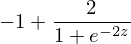

In [12]:
phi,z = sympy.symbols(r'\phi z')
phi = 2 / (1 + exp(-2 * z)) - 1
phi

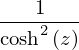

In [13]:
sympy.simplify(diff(phi))

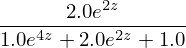

In [17]:
sympy.simplify(0.5 * (1 - (phi**2)))

## Biquad transformation 

In [2]:
s, m,c,d,n,a,b,z,y, T = sympy.symbols("s m c d n a b z y T")

Biquad transfer function

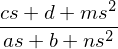

In [3]:
Hn = m*s**2 + c*s + d
Hd = n*s**2 + a*s + b
H = Hn / Hd
H

Substitute 
$s\rightarrow \frac{2}{T}\cdot\frac{z-1}{z+1}$

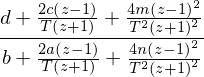

In [4]:
H.subs(s,(2/T)*(z-1)/(z+1))

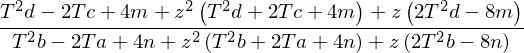

In [5]:
sympy.collect(sympy.simplify(sympy.collect(sympy.expand(H.subs(s,(2/T)*(z-1)/(z+1))),z)),z)

rewrite in terms of $z^{-1}$ delay notation and refactoring the time to get it to the format used in SimulC:

$$\frac{
\left( d - 2 c/T + 4 m/T^{2}\right)z^{-2} + 
 \left(2 d - 8 m/ T^{2}\right)z^{-1} + 
\left( d + 2  c/T + 4 m/T^{2}\right) 
}{
\left( b - 2 a/T + 4 n/T^{2}\right)z^{-2} + 
 \left(2  b - 8 n/T^{2}\right)z^{-1} +
\left( b + 2 a/T + 4 n/T^{2}\right) 
}
$$

## FEM solution

In [6]:
a, b, x, y, x1, x2, x3, x4, y1, y2, y3, y4 = sympy.symbols("a, b, x, y, x_1 x_2 x_3 x_4 y_1 y_2 y_3 y_4")

Solve the set of both equations for a and b


In [8]:
sols = sympy.solve ([
    (1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 - x , 
    (1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 - y
    ] , 
    [a, b]
    )


In [9]:
print(len(sols), len(sols[0]), len(sols[1]))


2 2 2


## a1

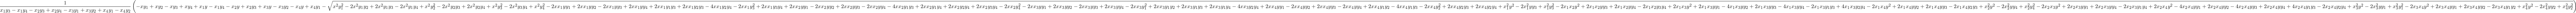

In [10]:
sympy.simplify(sols[0][0])

## b1

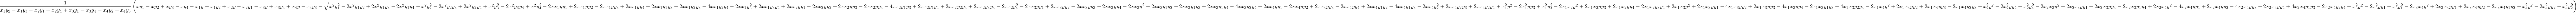

In [11]:
sympy.simplify(sols[0][1])

## a2

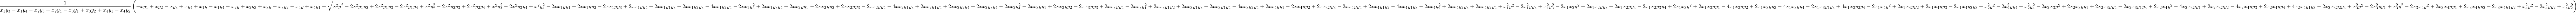

In [12]:
sympy.simplify(sols[1][0])

## b2

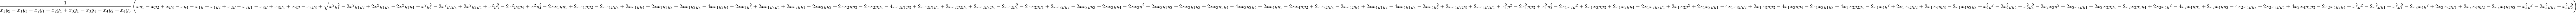

In [13]:
sympy.simplify(sols[1][1])

In [24]:
print(sympy.latex(sols[1][0]))

\frac{1}{x_{1} y_{3} - x_{1} y_{4} - x_{2} y_{3} + x_{2} y_{4} - x_{3} y_{1} + x_{3} y_{2} + x_{4} y_{1} - x_{4} y_{2}} \left(- x y_{1} + x y_{2} - x y_{3} + x y_{4} + x_{1} y - x_{1} y_{4} - x_{2} y + x_{2} y_{3} + x_{3} y - x_{3} y_{2} - x_{4} y + x_{4} y_{1} + \sqrt{x^{2} y_{1}^{2} - 2 x^{2} y_{1} y_{2} + 2 x^{2} y_{1} y_{3} - 2 x^{2} y_{1} y_{4} + x^{2} y_{2}^{2} - 2 x^{2} y_{2} y_{3} + 2 x^{2} y_{2} y_{4} + x^{2} y_{3}^{2} - 2 x^{2} y_{3} y_{4} + x^{2} y_{4}^{2} - 2 x x_{1} y y_{1} + 2 x x_{1} y y_{2} - 2 x x_{1} y y_{3} + 2 x x_{1} y y_{4} + 2 x x_{1} y_{1} y_{3} + 2 x x_{1} y_{2} y_{3} - 4 x x_{1} y_{2} y_{4} - 2 x x_{1} y_{3}^{2} + 2 x x_{1} y_{3} y_{4} + 2 x x_{2} y y_{1} - 2 x x_{2} y y_{2} + 2 x x_{2} y y_{3} - 2 x x_{2} y y_{4} - 4 x x_{2} y_{1} y_{3} + 2 x x_{2} y_{1} y_{4} + 2 x x_{2} y_{2} y_{4} + 2 x x_{2} y_{3} y_{4} - 2 x x_{2} y_{4}^{2} - 2 x x_{3} y y_{1} + 2 x x_{3} y y_{2} - 2 x x_{3} y y_{3} + 2 x x_{3} y y_{4} - 2 x x_{3} y_{1}^{2} + 2 x x_{3} y_{1} y_{2} + 2 x 

Evaluate at specific point

In [20]:
subsdic = {
    x1:1.1, y1:0.6,
    x2:2.9,y2:-1.4,
    x3:3.9,y3:3.4,
    x4:1.6,y4:3.4,
    x:3.34,y:0.01
}


In [23]:
a1 = sols[0][0].subs(subsdic)
b1 = sols[0][1].subs(subsdic)
a2 = sols[1][0].subs(subsdic)
b2 = sols[1][1].subs(subsdic)
print(f'a1={a1}\nb1={b1}\na2={a2}\nb2={b2}')

a1=1.13042299452897
b1=-0.375135562916902
a2=-3.68042299452897
b2=-55.6998644370831


In [29]:
print(f'a1={ccode(sols[0][0])}')

a1=(-x*y_1 + x*y_2 - x*y_3 + x*y_4 + x_1*y - x_1*y_4 - x_2*y + x_2*y_3 + x_3*y - x_3*y_2 - x_4*y + x_4*y_1 - sqrt(pow(x, 2)*pow(y_1, 2) - 2*pow(x, 2)*y_1*y_2 + 2*pow(x, 2)*y_1*y_3 - 2*pow(x, 2)*y_1*y_4 + pow(x, 2)*pow(y_2, 2) - 2*pow(x, 2)*y_2*y_3 + 2*pow(x, 2)*y_2*y_4 + pow(x, 2)*pow(y_3, 2) - 2*pow(x, 2)*y_3*y_4 + pow(x, 2)*pow(y_4, 2) - 2*x*x_1*y*y_1 + 2*x*x_1*y*y_2 - 2*x*x_1*y*y_3 + 2*x*x_1*y*y_4 + 2*x*x_1*y_1*y_3 + 2*x*x_1*y_2*y_3 - 4*x*x_1*y_2*y_4 - 2*x*x_1*pow(y_3, 2) + 2*x*x_1*y_3*y_4 + 2*x*x_2*y*y_1 - 2*x*x_2*y*y_2 + 2*x*x_2*y*y_3 - 2*x*x_2*y*y_4 - 4*x*x_2*y_1*y_3 + 2*x*x_2*y_1*y_4 + 2*x*x_2*y_2*y_4 + 2*x*x_2*y_3*y_4 - 2*x*x_2*pow(y_4, 2) - 2*x*x_3*y*y_1 + 2*x*x_3*y*y_2 - 2*x*x_3*y*y_3 + 2*x*x_3*y*y_4 - 2*x*x_3*pow(y_1, 2) + 2*x*x_3*y_1*y_2 + 2*x*x_3*y_1*y_3 + 2*x*x_3*y_1*y_4 - 4*x*x_3*y_2*y_4 + 2*x*x_4*y*y_1 - 2*x*x_4*y*y_2 + 2*x*x_4*y*y_3 - 2*x*x_4*y*y_4 + 2*x*x_4*y_1*y_2 - 4*x*x_4*y_1*y_3 - 2*x*x_4*pow(y_2, 2) + 2*x*x_4*y_2*y_3 + 2*x*x_4*y_2*y_4 + pow(x_1, 2)*pow(y, 2) - 2*

In [30]:
print(f'b1={ccode(sols[0][1])}')

b1=(x*y_1 - x*y_2 + x*y_3 - x*y_4 - x_1*y + x_1*y_2 + x_2*y - x_2*y_1 - x_3*y + x_3*y_4 + x_4*y - x_4*y_3 - sqrt(pow(x, 2)*pow(y_1, 2) - 2*pow(x, 2)*y_1*y_2 + 2*pow(x, 2)*y_1*y_3 - 2*pow(x, 2)*y_1*y_4 + pow(x, 2)*pow(y_2, 2) - 2*pow(x, 2)*y_2*y_3 + 2*pow(x, 2)*y_2*y_4 + pow(x, 2)*pow(y_3, 2) - 2*pow(x, 2)*y_3*y_4 + pow(x, 2)*pow(y_4, 2) - 2*x*x_1*y*y_1 + 2*x*x_1*y*y_2 - 2*x*x_1*y*y_3 + 2*x*x_1*y*y_4 + 2*x*x_1*y_1*y_3 + 2*x*x_1*y_2*y_3 - 4*x*x_1*y_2*y_4 - 2*x*x_1*pow(y_3, 2) + 2*x*x_1*y_3*y_4 + 2*x*x_2*y*y_1 - 2*x*x_2*y*y_2 + 2*x*x_2*y*y_3 - 2*x*x_2*y*y_4 - 4*x*x_2*y_1*y_3 + 2*x*x_2*y_1*y_4 + 2*x*x_2*y_2*y_4 + 2*x*x_2*y_3*y_4 - 2*x*x_2*pow(y_4, 2) - 2*x*x_3*y*y_1 + 2*x*x_3*y*y_2 - 2*x*x_3*y*y_3 + 2*x*x_3*y*y_4 - 2*x*x_3*pow(y_1, 2) + 2*x*x_3*y_1*y_2 + 2*x*x_3*y_1*y_3 + 2*x*x_3*y_1*y_4 - 4*x*x_3*y_2*y_4 + 2*x*x_4*y*y_1 - 2*x*x_4*y*y_2 + 2*x*x_4*y*y_3 - 2*x*x_4*y*y_4 + 2*x*x_4*y_1*y_2 - 4*x*x_4*y_1*y_3 - 2*x*x_4*pow(y_2, 2) + 2*x*x_4*y_2*y_3 + 2*x*x_4*y_2*y_4 + pow(x_1, 2)*pow(y, 2) - 2*p

In [31]:
print(f'a2={ccode(sols[1][0])}')

a2=(-x*y_1 + x*y_2 - x*y_3 + x*y_4 + x_1*y - x_1*y_4 - x_2*y + x_2*y_3 + x_3*y - x_3*y_2 - x_4*y + x_4*y_1 + sqrt(pow(x, 2)*pow(y_1, 2) - 2*pow(x, 2)*y_1*y_2 + 2*pow(x, 2)*y_1*y_3 - 2*pow(x, 2)*y_1*y_4 + pow(x, 2)*pow(y_2, 2) - 2*pow(x, 2)*y_2*y_3 + 2*pow(x, 2)*y_2*y_4 + pow(x, 2)*pow(y_3, 2) - 2*pow(x, 2)*y_3*y_4 + pow(x, 2)*pow(y_4, 2) - 2*x*x_1*y*y_1 + 2*x*x_1*y*y_2 - 2*x*x_1*y*y_3 + 2*x*x_1*y*y_4 + 2*x*x_1*y_1*y_3 + 2*x*x_1*y_2*y_3 - 4*x*x_1*y_2*y_4 - 2*x*x_1*pow(y_3, 2) + 2*x*x_1*y_3*y_4 + 2*x*x_2*y*y_1 - 2*x*x_2*y*y_2 + 2*x*x_2*y*y_3 - 2*x*x_2*y*y_4 - 4*x*x_2*y_1*y_3 + 2*x*x_2*y_1*y_4 + 2*x*x_2*y_2*y_4 + 2*x*x_2*y_3*y_4 - 2*x*x_2*pow(y_4, 2) - 2*x*x_3*y*y_1 + 2*x*x_3*y*y_2 - 2*x*x_3*y*y_3 + 2*x*x_3*y*y_4 - 2*x*x_3*pow(y_1, 2) + 2*x*x_3*y_1*y_2 + 2*x*x_3*y_1*y_3 + 2*x*x_3*y_1*y_4 - 4*x*x_3*y_2*y_4 + 2*x*x_4*y*y_1 - 2*x*x_4*y*y_2 + 2*x*x_4*y*y_3 - 2*x*x_4*y*y_4 + 2*x*x_4*y_1*y_2 - 4*x*x_4*y_1*y_3 - 2*x*x_4*pow(y_2, 2) + 2*x*x_4*y_2*y_3 + 2*x*x_4*y_2*y_4 + pow(x_1, 2)*pow(y, 2) - 2*

In [33]:
print(f'b2={ccode(sols[1][1])}')

b2=(x*y_1 - x*y_2 + x*y_3 - x*y_4 - x_1*y + x_1*y_2 + x_2*y - x_2*y_1 - x_3*y + x_3*y_4 + x_4*y - x_4*y_3 + sqrt(pow(x, 2)*pow(y_1, 2) - 2*pow(x, 2)*y_1*y_2 + 2*pow(x, 2)*y_1*y_3 - 2*pow(x, 2)*y_1*y_4 + pow(x, 2)*pow(y_2, 2) - 2*pow(x, 2)*y_2*y_3 + 2*pow(x, 2)*y_2*y_4 + pow(x, 2)*pow(y_3, 2) - 2*pow(x, 2)*y_3*y_4 + pow(x, 2)*pow(y_4, 2) - 2*x*x_1*y*y_1 + 2*x*x_1*y*y_2 - 2*x*x_1*y*y_3 + 2*x*x_1*y*y_4 + 2*x*x_1*y_1*y_3 + 2*x*x_1*y_2*y_3 - 4*x*x_1*y_2*y_4 - 2*x*x_1*pow(y_3, 2) + 2*x*x_1*y_3*y_4 + 2*x*x_2*y*y_1 - 2*x*x_2*y*y_2 + 2*x*x_2*y*y_3 - 2*x*x_2*y*y_4 - 4*x*x_2*y_1*y_3 + 2*x*x_2*y_1*y_4 + 2*x*x_2*y_2*y_4 + 2*x*x_2*y_3*y_4 - 2*x*x_2*pow(y_4, 2) - 2*x*x_3*y*y_1 + 2*x*x_3*y*y_2 - 2*x*x_3*y*y_3 + 2*x*x_3*y*y_4 - 2*x*x_3*pow(y_1, 2) + 2*x*x_3*y_1*y_2 + 2*x*x_3*y_1*y_3 + 2*x*x_3*y_1*y_4 - 4*x*x_3*y_2*y_4 + 2*x*x_4*y*y_1 - 2*x*x_4*y*y_2 + 2*x*x_4*y*y_3 - 2*x*x_4*y*y_4 + 2*x*x_4*y_1*y_2 - 4*x*x_4*y_1*y_3 - 2*x*x_4*pow(y_2, 2) + 2*x*x_4*y_2*y_3 + 2*x*x_4*y_2*y_4 + pow(x_1, 2)*pow(y, 2) - 2*p

# Deriving yaw-pitch-roll Euler angle equations

In [1]:
# general setup
import sympy
sympy.init_printing()
from sympy.printing.mathml import print_mathml
from IPython.display import display

In [2]:
# elementary symbols
phi, theta, psi = sympy.symbols(r'\phi \theta \psi')
wx, wy, wz = sympy.symbols(r'\omega_x \omega_y \omega_z')
t = sympy.symbols('t')

In [3]:
# main variables of interest
def vec(x, y, z): # helper: make a vector
    return sympy.Matrix([[x], [y], [z]])

# angular rate vector
w = vec(wx, wy, wz)

# Euler rate "vector"
dpsi,dtheta,dphi = [sympy.diff(x,t,evaluate=False) for x in [psi,theta,phi]]
deib = vec(dphi, dtheta, dpsi)

In [4]:
# rotation matrices
s, c = sympy.sin, sympy.cos

def Ephi(phi): return sympy.Matrix([[1,  0,      0],
                                    [0,  c(phi), s(phi)],
                                    [0, -s(phi), c(phi)]])
def Ethe(the): return sympy.Matrix([[c(the), 0, -s(the)],
                                    [0,      1,  0],
                                    [s(the), 0,  c(the)]])
def Epsi(psi): return sympy.Matrix([[ c(psi), s(psi), 0],
                                    [-s(psi), c(psi), 0],
                                    [0,       0,      1]])

6700-OSSIM-10000/03 RPT, Eq. (3.1.57):

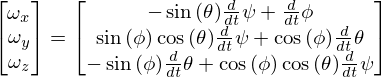

In [5]:
# intermediate frame 2 to body (roll rotation)
H2b = Ephi(phi)
# intermediate frame 1 to frame 1 (pitch rotation)
H12 = Ethe(theta)

# the core equation; each euler rate can be expressed as an angular rate about some axis;
# these sum to the total angular rate, but we must rotate everything to the body axes.
w_sum_deib = vec(dphi, 0, 0) + H2b * vec(0, dtheta, 0) + H2b * H12 * vec(0, 0, dpsi)

display(sympy.Equality(w, w_sum_deib))

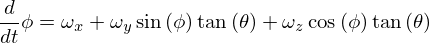

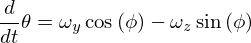

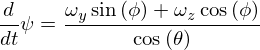

In [6]:
sol = sympy.solve(w - w_sum_deib, deib)
for var in deib:
    display(sympy.Equality(var, sol[var]))

## convert to python functions

    vignet =(np.cos(np.pi*vangl/(2*angles[-1])))**0.1 + 0.09

c + \cos^{p}{\left(\frac{\pi a}{2 m} \right)}


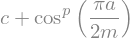

In [73]:
import sympy
import numpy as np
from sympy.codegen.ast import Assignment

t, p,v, x,y,s, m,c,d,n,a,b,z,y, T = sympy.symbols("\\theta p v x y s m c d n a b z y T")

y = (sympy.cos(sympy.pi * a / (2. * m)))**p + c
mstr = sympy.latex(y)
subsdic = {c:0.09, p:0.1,m:0.471}
T = y.subs(subsdic)
lstr = sympy.latex(T)

print(mstr)
display(y)
display(T)

In [79]:
# pstr = sympy.pycode(Assignment(v, T)).replace('math','np')
pstr = sympy.pycode(T).replace('math','np')

print(pstr)
a = np.linspace(0,0.471,100)
eval(pstr)

np.cos(1.06157112526539*np.pi*a)**0.1 + 0.09


array([1.09      , 1.08998741, 1.08994964, 1.08988668, 1.08979849,
       1.08968503, 1.08954627, 1.08938213, 1.08919255, 1.08897745,
       1.08873673, 1.08847029, 1.088178  , 1.08785975, 1.08751538,
       1.08714475, 1.08674768, 1.086324  , 1.08587351, 1.085396  ,
       1.08489125, 1.08435902, 1.08379906, 1.08321109, 1.08259484,
       1.08194999, 1.08127622, 1.0805732 , 1.07984055, 1.0790779 ,
       1.07828485, 1.07746096, 1.07660579, 1.07571885, 1.07479966,
       1.07384767, 1.07286233, 1.07184305, 1.07078919, 1.06970011,
       1.06857511, 1.06741345, 1.06621435, 1.06497699, 1.06370051,
       1.06238397, 1.06102641, 1.05962678, 1.058184  , 1.05669689,
       1.05516422, 1.05358467, 1.05195684, 1.05027924, 1.04855027,
       1.04676824, 1.04493132, 1.04303756, 1.04108489, 1.03907105,
       1.03699364, 1.03485005, 1.03263749, 1.03035293, 1.02799309,
       1.0255544 , 1.02303299, 1.02042464, 1.01772473, 1.0149282 ,
       1.01202949, 1.00902246, 1.00590034, 1.00265558, 0.99927

\cos^{0.1}{\left(1.06157112526539 \cdot\pi\cdot \theta \right)} + 0.09


<AxesSubplot:>

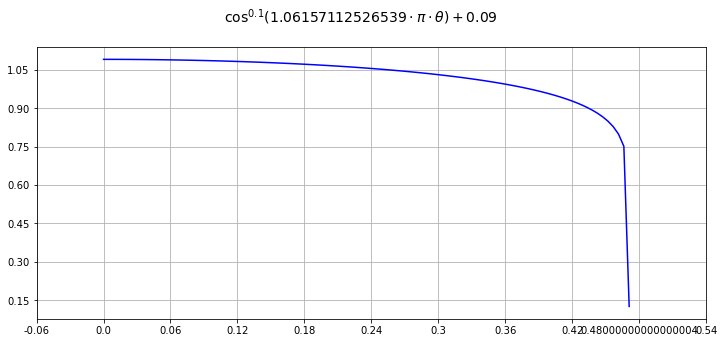

In [83]:
import pyradi.ryplot as ryplot
lstr = lstr.replace(r' \pi a ',r' \cdot\pi\cdot \theta ')
print(lstr)
p = ryplot.Plotter(1,1,1,f'${lstr}$',(12,5))
p.plot(1,a,eval(pstr))
                   
                   